In [164]:
!pip uninstall openpyxl

Found existing installation: openpyxl 3.0.9
Uninstalling openpyxl-3.0.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-3.0.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-3.0.9


In [165]:
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)


In [166]:
import pandas as pd
data_cancer = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv")
data_houses =pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
df_wines = pd.read_excel("/content/wine.xlsx")

In [167]:
display(df_wines.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [168]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import numpy as np
from sklearn import datasets
data_iris = datasets.load_iris()
x_iris = data_iris.data
y_iris = data_iris.target


In [169]:
print(np.shape(x_iris))
print(np.shape(y_iris))
#reshape de y
y_iris = np.reshape(y_iris,(len(y_iris),1))
print(np.shape(y_iris))
print(np.shape(x_iris[:,0]))

(150, 4)
(150,)
(150, 1)
(150,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

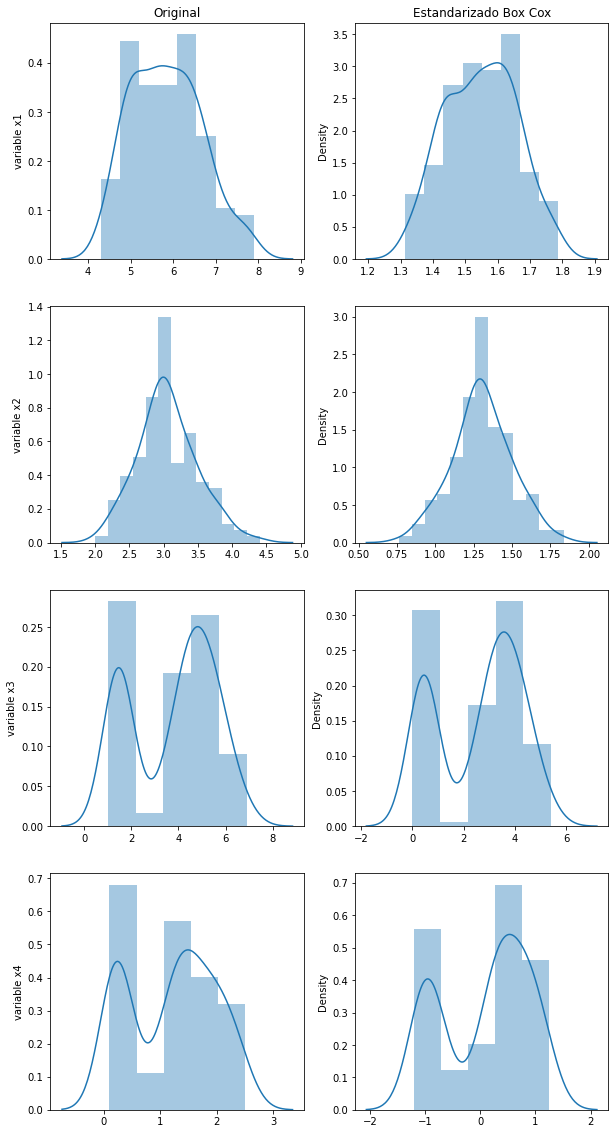

In [170]:
from matplotlib import figure
#Preprocesamiento de la data obtenida:
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pylab import subplots
from scipy import stats

fig,ax = plt.subplots(4,2,figsize =(10,20))
#1-Estandarizacion

#grafico de data original y transformada box cox
ax[0][0].set_title("Original")
ax[0][1].set_title("Estandarizado Box Cox")
x_iris_std = []
for i in range(0,4):
  x_iris_std.append([])
  x_iris_std[i] = stats.boxcox(x_iris[:,i])[0]
  x_iris_std[i] = np.reshape(x_iris_std[i],(150,))
  sns.distplot(x_iris[:,i],ax = ax[i][0])
  sns.distplot(x_iris_std[i],ax = ax[i][1])
  ax[i][0].set_ylabel(f"variable x{i+1}")


In [171]:
print(np.shape(x_iris_std))

(4, 150)


In [172]:
x_iris_std = np.reshape(x_iris_std,(150,4))
print(np.shape(x_iris_std))

(150, 4)


In [173]:
#2-escalamiento de la data
from sklearn.preprocessing import MinMaxScaler as MMS
escalador = MMS()
x_iris_escal = escalador.fit_transform(x_iris_std)


In [174]:

# 3-separación de la data 
from sklearn.model_selection import train_test_split as tts
y_iris = np.reshape(y_iris,(150,))
x_train,x_test,y_train,y_test = tts(x_iris_escal,y_iris,test_size=0.2,random_state = 42)
print(np.shape(y_train))


(120,)


In [175]:
# 4-evaluación de los modelos

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import multilabel_confusion_matrix,rand_score
modeloRFC = RFC(n_estimators=150)
modeloDTC = DTC()
modelos = [modeloRFC,modeloDTC]
metrics_RFC = []
metrics_DTC = []
for modelo in modelos:
  modelo.fit(x_train,y_train)

  y_pred = modelo.predict(x_test)
  y_pred_train = modelo.predict(x_train)

  rand_score_test = rand_score(y_test,y_pred)
  rand_score_train = rand_score(y_train,y_pred_train)
  multilabel_confusion= multilabel_confusion_matrix(y_test,y_pred)
  if modelo == modeloRFC: 
     metrics_RFC.append([[rand_score_test,rand_score_train],[multilabel_confusion]])
  else:
     metrics_DTC.append([[rand_score_test,rand_score_train],[multilabel_confusion]])
print(metrics_RFC)
print(metrics_DTC)


[[[0.8528735632183908, 1.0], [array([[[20,  0],
        [ 0, 10]],

       [[18,  3],
        [ 1,  8]],

       [[18,  1],
        [ 3,  8]]])]]]
[[[0.7793103448275862, 1.0], [array([[[19,  1],
        [ 0, 10]],

       [[18,  3],
        [ 4,  5]],

       [[16,  3],
        [ 3,  8]]])]]]


El modelo RF es más robusto que el árbol de decisiones, debido a que el primero emplea una cantidad de arboles determinada por el usuario, lo que brinda una mayor precisión, si es que se compara con un modelo CART que solo emplea un arbol

In [176]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
df_house = pd.DataFrame(data_houses)
display(df_house.head())


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [177]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [178]:
def columnas(df):
   columnas = df.columns
   col = list(columnas)
   return col

In [179]:
#Breve análisis estadistico
from numpy.core.fromnumeric import mean
from numpy.core.defchararray import count
for columna in columnas(data_houses):
  print(columna)
  print(data_houses[columna].describe())
  print("-"*100)


Suburb
count         13580
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object
----------------------------------------------------------------------------------------------------
Address
count                13580
unique               13378
top       36 Aberfeldie St
freq                     3
Name: Address, dtype: object
----------------------------------------------------------------------------------------------------
Rooms
count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64
----------------------------------------------------------------------------------------------------
Type
count     13580
unique        3
top           h
freq       9449
Name: Type, dtype: object
----------------------------------------------------------------------------------------------------
Price
count    1.358000e+04
mea

In [199]:
#Se elimina la columna Type(es la categorica mas sencilla) porque sera nuestra variable a predecir, BuildingArea y YearBuilt continenen pocos datos, así que se eliminan esas columnas
df_house_x = df_house.drop(columns =["Type","BuildingArea","YearBuilt"])
df_house_y = np.array(df_house["Type"])


#preprocesamiento de la data:


 #1-etiquetas numericas para las clases categoricas
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df_house_x["Suburb"] = Encoder.fit_transform(df_house_x["Suburb"])
df_house_x["Address"] = Encoder.fit_transform(df_house_x["Address"])
df_house_y = Encoder.fit_transform(df_house_y)
df_house_x["Method"] = Encoder.fit_transform(df_house_x["Method"])
df_house_x["SellerG"] = Encoder.fit_transform(df_house_x["SellerG"])
df_house_x["Date"] = Encoder.fit_transform(df_house_x["Date"])
df_house_x["CouncilArea"] = Encoder.fit_transform(df_house_x["CouncilArea"])
df_house_x["Regionname"] = Encoder.fit_transform(df_house_x["Regionname"])
#reemplazando los infinitos con vacio y estos espacios vacios con los valores de la fila inmediatamente inferior,si no hay,con la inmediatamente superior
df_house_x = df_house_x.replace([np.inf, -np.inf],np.nan)
df_house_x = df_house_x.fillna(method = "ffill" )
if(np.any(np.isnan(df_house_x) == True)):
  df_house_x = df_house_x.fillna(method = "bfill" )


In [200]:
df_house_x.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int64  
 1   Address        13580 non-null  int64  
 2   Rooms          13580 non-null  int64  
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  int64  
 5   SellerG        13580 non-null  int64  
 6   Date           13580 non-null  int64  
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13580 non-null  float64
 12  Landsize       13580 non-null  float64
 13  CouncilArea    13580 non-null  int64  
 14  Lattitude      13580 non-null  float64
 15  Longtitude     13580 non-null  float64
 16  Regionname     13580 non-null  int64  
 17  Propertycount  13580 non-null  float64
dtypes: flo

In [182]:
np.all(np.isfinite(df_house_x))
np.any(np.isnan(df_house_x))


False

In [183]:
np.all(np.isfinite(df_house_x))


True

In [184]:
print(np.shape(df_house_y))

(13580,)


In [201]:

#2-estandarización de la data
from sklearn.preprocessing import StandardScaler
#reshape de y--> antes de ello convertido en un objeto nd.array
df_house_y = np.reshape(df_house_y,(13580,1))

std = StandardScaler()
df_house_xstd=std.fit_transform(df_house_x)
print(np.shape(df_house_x))


(13580, 18)


In [203]:
#3- escalarización de la data
from sklearn.preprocessing import MinMaxScaler as MMS
escalador2 = MMS()
df_house_xscal = escalador2.fit_transform(df_house_xstd)


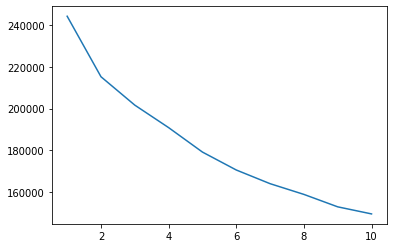

In [204]:
from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means_cancer = KMeans(n_clusters = i)
  k_means_cancer.fit(df_house_xstd)
  inercia.append(k_means_cancer.inertia_)

plt.plot(range(1,11),inercia)


In [205]:
k_means2 = KMeans(n_clusters = 2) 
k_means2.fit(df_house_xscal)
labels2 = k_means2.labels_


In [206]:
#Modelo
from sklearn.ensemble import GradientBoostingClassifier as SGB
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
modelo_SGB = SGB(learning_rate=0.01,n_estimators=150)
pca = PCA(n_components = 2)
xpca = pca.fit_transform(df_house_xscal)


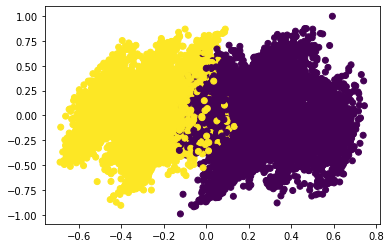

In [240]:
#ploteamos el modelo de dos componentes(al que se le ha aplicado PCA)
plt.scatter(xpca[:,0],xpca[:,1],c = labels2 )
plt.show()




In [245]:
from pandas import DataFrame 
df_excel_y=pd.DataFrame(df_house_y)
df_excel_y.to_excel("datay.xlsx")

In [236]:
#Entrenamiento de la data(SGD sin PCA)
x_train2,x_test2,y_train2,y_test2 = tts(df_house_xscal,df_house_y,test_size = 0.2, random_state = 42)
modelo_SGB.fit(x_train2,y_train2)



y_pred2 = modelo_SGB.predict(x_test2)
y_pred2_train = modelo_SGB.predict(x_train2)

houses_r2_test = r2_score(y_test2,y_pred2)
houses_r2_train= r2_score(y_train2,y_pred2_train)
print(houses_r2_test)
print(houses_r2_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5697394993666298
0.5556605392871943
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [235]:
#Entrenamiento de la data(SGD con PCA)
x_train3,x_test3,y_train3,y_test3 = tts(xpca,df_house_y,test_size = 0.2, random_state = 42)
modelo_SGB.fit(x_train3,y_train3)

y_pred3 = modelo_SGB.predict(x_test3)
y_pred3_train = modelo_SGB.predict(x_train3)


houses_r2_test_PCA = r2_score(y_test3,y_pred3)
houses_r2_train_PCA= r2_score(y_train3,y_pred3_train)
print(houses_r2_test_PCA)
print(houses_r2_train_PCA)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.34146381651105884
-0.36527629002711826


Efectuar PCA claramente afecta negativamente el rendimiento del modelo;en este caso las variables no pueden absorber características de otras variables, no hay una correlación lo suficientemente fuerte entre los features; al reducir el modelo a menos componentes, se pierde demasiada información

In [223]:
from math import nan
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 

"""
# en este caso , mi variable y  tiene vacios, elimino las filas con precios vacios
df_wines = df_wines.dropna(subset=["price"],axis = 0)
#algunas variables se han optado por no analizarse, previo breve analisis estadistico efectuado lineas abajo



In [224]:
df_wines_x = df_wines.drop(columns =["price","description","region_2","designation","winery","Unnamed: 0"])
df_wines_y = np.array(df_wines["price"])


In [225]:
columnas(df_wines_x)

['country', 'points', 'province', 'region_1', 'variety']

In [226]:
from numpy.core.fromnumeric import mean
from numpy.core.defchararray import count
for columna in columnas(df_wines_x):
  print(columna)
  print(df_wines_x[columna].describe())
  print("-"*100)
#conversion a str


country
count     137230
unique        46
top           US
freq       62139
Name: country, dtype: object
----------------------------------------------------------------------------------------------------
points
count    137235.000000
mean         87.787919
std           3.221680
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
----------------------------------------------------------------------------------------------------
province
count         137230
unique           446
top       California
freq           44356
Name: province, dtype: object
----------------------------------------------------------------------------------------------------
region_1
count          114393
unique           1197
top       Napa Valley
freq             6191
Name: region_1, dtype: object
----------------------------------------------------------------------------------------------------
variety
count        

In [227]:
#para visualizar cantidad de datos nulos
df_wines_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   country   137230 non-null  object
 1   points    137235 non-null  int64 
 2   province  137230 non-null  object
 3   region_1  114393 non-null  object
 4   variety   137235 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.3+ MB


In [228]:
#Preprocesamiento
 #1.one label encoding
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df_wines_x["country"] =   Encoder.fit_transform(df_wines_x["country"])
df_wines_x["province"] =   Encoder.fit_transform(df_wines_x["province"])
df_wines_x["variety"] =   Encoder.fit_transform(df_wines_x["variety"])
df_wines_x["region_1"] =   Encoder.fit_transform(df_wines_x["region_1"])
#reemplazando los infinitos con vacio y estos espacios vacios con los valores de la fila inmediatamente inferior,si no hay,con la inmediatamente superior
df_wines_x = df_wines_x.replace([np.inf, -np.inf],np.nan)
df_wines_x = df_wines_x.fillna(method = "ffill" )
if(np.any(np.isnan(df_wines_x) == True)):
  df_wines_x = df_wines_x.fillna(method = "bfill" )


In [229]:
df_wines_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   country   137235 non-null  int64
 1   points    137235 non-null  int64
 2   province  137235 non-null  int64
 3   region_1  137235 non-null  int64
 4   variety   137235 non-null  int64
dtypes: int64(5)
memory usage: 6.3 MB


In [ ]:
print(np.shape(df_wines_x))

In [230]:
#preprocesamiento de la data
# 1. estandarizar
  #reshape de y
df_wines_y = np.reshape(df_wines_y,(len(df_wines_y),1))
from sklearn.preprocessing import StandardScaler
std2 = StandardScaler()
df_wines_xstd = std2.fit_transform(df_wines_x)
df_wines_ystd = std2.fit_transform(df_wines_y)



In [231]:
# 2. escalar
from sklearn.preprocessing import MinMaxScaler as MMS
escalador3 = MMS()
df_wines_xscal = escalador3.fit_transform(df_wines_xstd)
df_wines_yscal = escalador3.fit_transform(df_wines_ystd)


In [232]:
#separar la data
from sklearn.ensemble import RandomForestRegressor as RFR
modelo_RFR = RFR(n_estimators=200)
x_train4,x_test4,y_train4,y_test4 = tts(df_wines_xscal,df_wines_yscal,test_size = 0.2,random_state = 42)


In [233]:
modelo_RFR.fit(x_train4,y_train4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=200)

In [234]:
y_pred4 = modelo_RFR.predict(x_test4)
y_pred4_train = modelo_RFR.predict(x_train4)
r2_wine =r2_score(y_test4,y_pred4)
r2_wine_train=r2_score(y_train4,y_pred4_train)
print(r2_wine)
print(r2_wine_train)
print((r2_wine_train-r2_wine)/r2_wine_train)

0.5729866085133914
0.7147609096106029
0.19835206317375298


el r2 del modelo testeado ha caido un 19% respecto al r2 del modelo de entrenamiento. No se ha incurrido en un sobreajuste, sin embargo; una red neuronal o un modelo SGB podría mejorar el score del modelo

In [211]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
data_cancer_x = data_cancer.drop(columns=["diagnosis","id"])
data_cancer_y = np.array(data_cancer["diagnosis"])

#preprocesamiento
#0-labelsencoders
from sklearn.preprocessing import LabelEncoder
Encoder2 = LabelEncoder()
data_cancer_y = Encoder2.fit_transform(data_cancer_y)
#reshape de y
data_cancer_y = np.reshape(data_cancer_y,(len(data_cancer_y),1))
#1-estandarizar
from sklearn.preprocessing import StandardScaler
std3 = StandardScaler()
data_cancer_xstd = std3.fit_transform(data_cancer_x) 
data_cancer_ystd = std3.fit_transform(data_cancer_y) 


In [212]:
#2-escalar
from sklearn.preprocessing import MinMaxScaler as MMS
escalador4 = MMS()
data_cancer_xscal = escalador4.fit_transform(data_cancer_xstd)
data_cancer_yscal = escalador4.fit_transform(data_cancer_ystd)

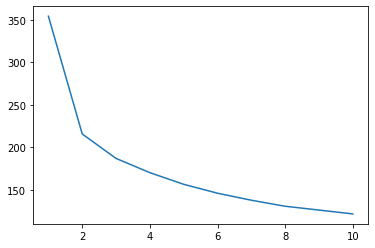

In [213]:
#3-clusterización(para efectuar una comparación con SGD y PCA)
from sklearn.cluster import KMeans
lista_inercia = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(data_cancer_xscal)
  lista_inercia.append(k_means.inertia_)
plt.plot(range(1,11),lista_inercia)

In [214]:
#el codo evidencia un mayor quiebre en la abscisa con valor x = 2
k_means2 = KMeans(n_clusters=2)
k_means2.fit(data_cancer_xscal)
label = k_means2.labels_


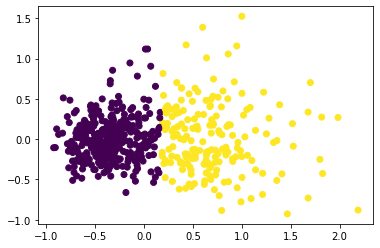

In [215]:
#ploteamos las dos componentes a las que hemos reducido nuestro modelo
pca2 = PCA(n_components=2)
xpca2 = pca2.fit_transform(data_cancer_xscal)
plt.scatter(xpca2[:,0],xpca2[:,1],c = label)

In [216]:
#separamos la data
x_train5,x_test5,y_train5,y_test5 = tts(data_cancer_xscal,data_cancer_yscal,test_size = 0.2,random_state = 42)


In [217]:
#modelado de red neuronal
import tensorflow as tf
modeloNN = tf.keras.Sequential([
    tf.keras.Input(shape =(30,)),
    tf.keras.layers.Dense(30,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(2,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")

])
modeloNN.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),metrics = ["accuracy"])


In [218]:
#entrenamiento de la red neuronal

modeloNN.fit(x_train5,y_train5,epochs = 1000,verbose = 0)


In [219]:
#metrica de la red neuronal
from sklearn.metrics import recall_score,precision_score

recall_modelo =[]
precision_modelo =[]
y_predict_cancer = np.round(modeloNN.predict(x_test5),0)
y_predict_cancer_train = np.round(modeloNN.predict(x_train5),0)

recall_score_modelo_test = recall_score(y_test5,y_predict_cancer)
recall_score_modelo_train = recall_score(y_train5,y_predict_cancer_train)

recall_modelo.append([recall_score_modelo_test,recall_score_modelo_train])

precision_score_modelo_test= precision_score(y_test5,y_predict_cancer)
precision_score_modelo_train = precision_score(y_train5,y_predict_cancer_train)

precision_modelo.append([precision_score_modelo_test,precision_score_modelo_train])
print(recall_modelo)
print(precision_modelo)



[[0.9534883720930233, 0.9881656804733728]]
[[0.9534883720930233, 1.0]]


In [220]:
#lo comparamos con SGD combinado con PCA
from sklearn.ensemble import GradientBoostingClassifier as SGB

x_train6,x_test6,y_train6,y_test6 = tts(xpca2,data_cancer_yscal,test_size = 0.2)

modelo_SGB2 = SGB()
modelo_SGB2.fit(x_train6,y_train6)
recall_modelo2 =[]
precision_modelo2 =[]
y_predict_cancer2 = np.round(modelo_SGB2.predict(x_test6),0)
y_predict_cancer_train2 = np.round(modelo_SGB2.predict(x_train6),0)

recall_score_modelo_test2 = recall_score(y_test6,y_predict_cancer2)
recall_score_modelo_train2= recall_score(y_train6,y_predict_cancer_train2)

recall_modelo2.append([recall_score_modelo_test2,recall_score_modelo_train2])

precision_score_modelo_test2= precision_score(y_test6,y_predict_cancer2)
precision_score_modelo_train2 = precision_score(y_train6,y_predict_cancer_train2)

precision_modelo2.append([precision_score_modelo_test2,precision_score_modelo_train2])
print(recall_modelo2)
print(precision_modelo2)





[[0.9069767441860465, 0.9881656804733728]]
[[0.975, 1.0]]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La red neuronal es más precisa que un modelo SGD con PCA,el cual es uno de los métodos  más robustos de ML. Igual hay dependencia del número de neuronas y capas a emplear, así como del optimizador empleado; usando los parámetros correctos la red neuronal puede mejorar la precison comparado con un modelo SGB con PCA

In [221]:
"""
Crea una función que aplane la ruta de una imágen
"""
def aplane_image(ruta):
  imagen = plt.imread(ruta)
  imagen_vector = imagen.flatten()
  return imagen_vector, np.shape(imagen_vector)

In [222]:
aplane_image("/content/papa.jpg")

(array([  5,   5,   7, ..., 244, 236, 225], dtype=uint8), (151380,))